In [ ]:
import math
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# u(x;0) = (x + 0.2) * sin(pi * x / 2)
# du/dt(x;0) = 1 + x^2
# u(0;t) = 0
# u(1;t) = 1.2 * (t + 1)
# x in [0;1]
# h = 0.1
# t in [0;0.5]

In [3]:
h = 0.1
l = 1
N = round(l / h) + 1

t_0 = 0.5
dt = 0.01
K = round(t_0 / dt) + 1

In [4]:
x_i = lambda i: i * h
t_j = lambda j: j * dt

In [5]:
U = [[None for i in range(N)] for k in range(K)]

In [6]:
# set u(x;0) = (x + 0.2) * sin(pi * x / 2)
f = lambda x: (x + 0.2) * math.sin(math.pi * x / 2)

for i in range(len(U[0])):
    U[0][i] = f(x_i(i))

In [7]:
# set u(0;t) = 0

for i in range(len(U)):
    U[i][0] = 0

In [8]:
# set u(1;t) = 1.2 * (t + 1)

for i in range(len(U)):
    U[i][-1] = 1.2 * (t_j(i) + 1)

In [9]:
f_1 = lambda x: (x + 0.2) * math.sin(math.pi * x / 2)
f_2 = lambda x: 1 + x ** 2

for i in range(1, len(U[0]) - 1):
    U[1][i] = f_1(x_i(i)) + f_2(x_i(i)) * dt + (dt ** 2) / (2 * h ** 2) * (f_1(x_i(i+1)) - 2 * f_1(x_i(i)) + f_1(x_i(i-1)))

In [10]:
for k in range(1, K-1):
    for i in range(1, N-1):
        U[k+1][i] = (dt ** 2) / (h ** 2) * (U[k][i+1] - 2 * U[k][i] + U[k][i-1]) + 2 * U[k][i] - U[k-1][i]

Text(0.5, 0.98, 'Зависимость перемещения от координаты и времени')

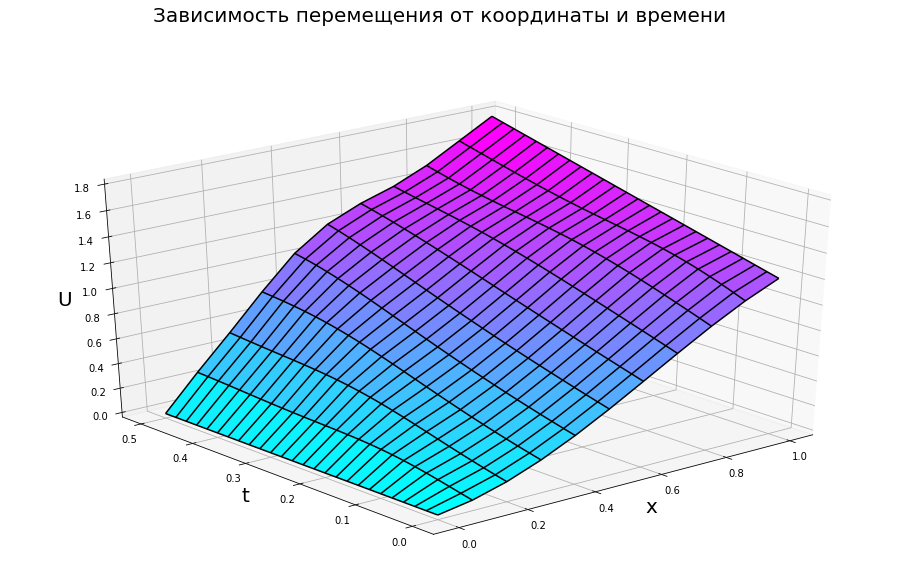

In [11]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, l + h/10, h)
t = np.arange(0, t_0 + dt/10, dt)
X, t = np.meshgrid(X, t)
U = np.array(U)

# Plot the surface.
ax.plot_surface(X, t, np.array((U)), cmap='cool')
ax.plot_wireframe(X, t, np.array((U)), color='black')

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("t", fontsize=20)
ax.set_zlabel("U", fontsize=20)
ax.view_init(30, 230)

fig.suptitle('Зависимость перемещения от координаты и времени', fontsize=20)

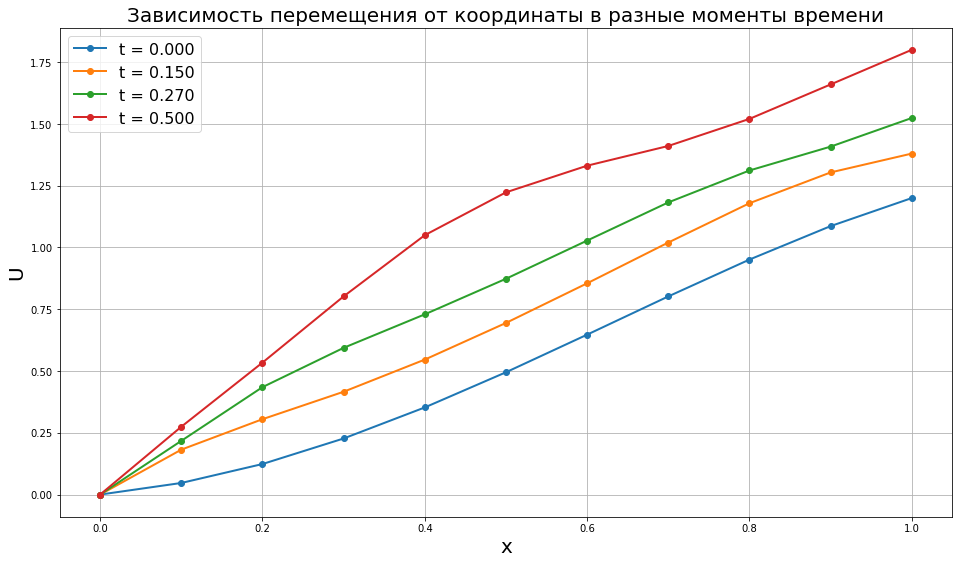

In [12]:
fig = plt.figure(figsize=(16, 9))
plt.grid()
plt.title('Зависимость перемещения от координаты в разные моменты времени', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('U', fontsize=20)

x = np.arange(0, l + h/10, h)

y1 = np.array(U[0])
plt.plot(x, y1, linewidth=2, label='t = %.3f' % t_j(0), linestyle='-', marker='o')

y2 = np.array(U[15])
plt.plot(x, y2, linewidth=2, label='t = %.3f' % t_j(15), linestyle='-', marker='o')

y3 = np.array(U[27])
plt.plot(x, y3, linewidth=2, label='t = %.3f' % t_j(27), linestyle='-', marker='o')

y4 = np.array(U[50])
plt.plot(x, y4, linewidth=2, label='t = %.3f' % t_j(50), linestyle='-', marker='o')

plt.legend(fontsize=16)

In [13]:
df = pd.DataFrame(U)

In [19]:
df.round(3).to_csv('out.csv')